In [46]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
import requests
import json
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [47]:
df = pd.read_csv('C:\\Users\\Administrador\\Desktop\\Data Scientist\\Data Science\\Proyecto\\GitHub\\Proyecto_DataScience_Coder\\data\\BTC_Data_final.csv')
print(df.dtypes)
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'].dtypes)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

Date                       object
priceUSD                  float64
size                      float64
sentbyaddress               int64
transactions                int64
mining_profitability      float64
sentinusd                 float64
transactionfees           float64
median_transaction_fee    float64
confirmationtime          float64
marketcap                   int64
transactionvalue          float64
mediantransactionvalue    float64
tweets                      int64
google_trends             float64
fee_to_reward             float64
activeaddresses             int64
top100cap                 float64
dtype: object
datetime64[ns]


**INTRODUCCIÓN**

Bitcoin vio su nacimiento en el año 2009, y hasta la actualidad se desconoce la identidad real de su creador, a quien se le atribuye el seudónimo de Satoshi Nakamoto pudiendo ser un individuo o un grupo de personas.

Bitcoin es una moneda virtual o un medio de intercambio electrónico que sirve para adquirir productos y servicios como cualquier otra moneda. La diferencia con el resto de las monedas "FIAT" se da en que esta moneda digital es descentralizada, es decir que no existe una autoridad o ente de control que sea responsable de su emisión y registro de sus movimientos.

Por tal motivo, el precio de este activo se regula en el propio mercado de compra-venta, donde los oferentes y compradores emiten órdenes de venta y órdenes de compra estableciendo precios de entrada o salida al activo.

En los últimos años, se ha visto un creciente interés por parte de grandes empresas en aceptar Bitcoin como forma de pago, o bien resguardar parte de su patrimonio en este activo; esto ha generado que se dispare su precio llegando a tocar casi los usd 70.000 en noviembre de 2021.

**Abstracto, motivación y audiencia**

Este proyecto de data science tiene como objetivo analizar la evolución histórica del precio de Bitcoin utilizando un conjunto de datos que incluye información sobre la fecha, el precio en USD, el número de transacciones, la capitalización de mercado, la presencia de la tematica Bitcoin en redes sociales y otros indicadores relevantes.

La hipótesis principal de este proyecto es que el precio de Bitcoin ha sido influenciado por una variedad de factores, incluyendo la adopción por parte de grandes empresas, la regulación gubernamental, la oferta y la demanda del mercado y la actividad en las redes sociales. Se espera que este análisis proporcione una mejor comprensión de cómo estos factores han afectado al precio de Bitcoin a lo largo del tiempo y cómo podrían seguir influyendo en el futuro.

La audiencia principal de este proyecto es cualquier persona interesada en Bitcoin y en las criptomonedas en general, incluyendo inversores, entusiastas y empresas que podrían estar considerando la adopción de esta tecnología. Además, los resultados de este análisis podrían ser útiles para reguladores y responsables políticos que buscan comprender mejor los factores que influyen en el precio de Bitcoin y cómo podrían afectar la economía en general.

**Análisis Exploratorio de Datos (EDA)**

En primer lugar para realizar el análisis exploratorio de datos es conveniente comprobar que no existan valores nulos, y a su vez obtener que tipos de datos hay en cada columna.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    3180 non-null   datetime64[ns]
 1   priceUSD                3180 non-null   float64       
 2   size                    3180 non-null   float64       
 3   sentbyaddress           3180 non-null   int64         
 4   transactions            3180 non-null   int64         
 5   mining_profitability    3180 non-null   float64       
 6   sentinusd               3180 non-null   float64       
 7   transactionfees         3180 non-null   float64       
 8   median_transaction_fee  3180 non-null   float64       
 9   confirmationtime        3180 non-null   float64       
 10  marketcap               3180 non-null   int64         
 11  transactionvalue        3180 non-null   float64       
 12  mediantransactionvalue  3180 non-null   float64 

**GRÁFICOS Y ANÁLISIS GENERALES SOBRE BITCOIN**

Text(0, 0.5, 'Transacciones')

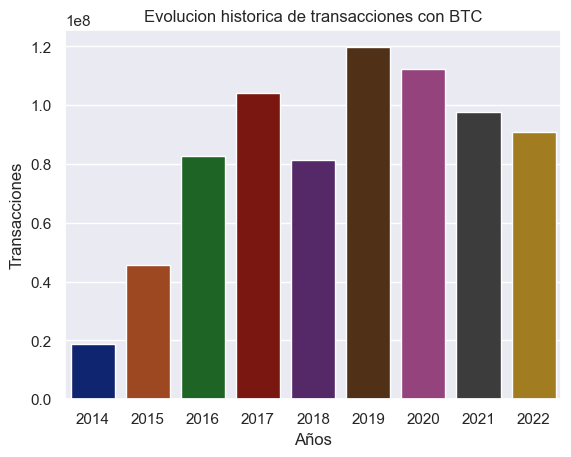

In [49]:
df_tran = df.groupby(['Year'])['transactions'].sum().reset_index()


sns.set_palette("dark")
sns.set_style("darkgrid")

ax = sns.barplot(x="Year", y="transactions", data=df_tran)
ax.set_title('Evolucion historica de transacciones con BTC')
plt.xlabel("Años")
plt.ylabel("Transacciones")

En este caso se analiza la evolución histórica de transacciones realizadas en la blockchain de Bitcoin.

In [50]:
df_tran.head(10)

,Year,transactions
0,2014,18951966
1,2015,45618870
2,2016,82571772
3,2017,104010023
4,2018,81340729
5,2019,119726948
6,2020,112497226
7,2021,97743767
8,2022,90826733


Se puede ver que hasta el año 2019 se dio un crecimiento grande en este índice, y en 2020 ha comenzado un retroceso en la cantidad de transacciones anuales, lo cual puede responder a la inestabilidad en el precio del activo.

**HEATMAP de precios de Bitcoin**

El siguiente HeatMap muestra los precios máximos que ha tenido Bitcoin en cada mes de cada año desde su creación.

C:\Users\Administrador\AppData\Local\Temp\ipykernel_10740\4016053099.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_price_order1 = df_price_order.pivot("Month", "Year", "priceUSD")


Text(0.5, 1.0, 'Precio Máximo por mes y año')

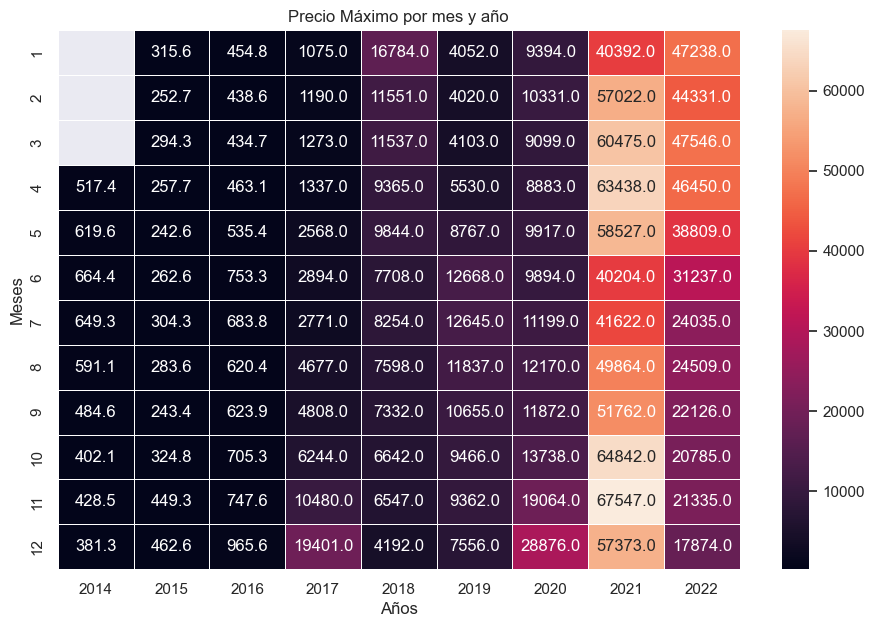

In [51]:
df_price_order = df.groupby(['Year', 'Month'])['priceUSD'].max().reset_index()


df_price_order1 = df_price_order.pivot("Month", "Year", "priceUSD")

f, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(df_price_order1, annot=True, fmt=".1f", linewidths=.5, ax=ax)
plt.xlabel("Años")
plt.ylabel("Meses")
ax.set_title('Precio Máximo por mes y año')

Podemos ver que su precio más alto fue visto en el mes de noviembre de 2021, cuando alcanzó el monto de USD 67.547

**TRANSACCIONES ENVIADAS DE BTC COTIZADAS EN USD**

Text(0, 0.5, 'Transacciones cotizadas en millones de dolares')

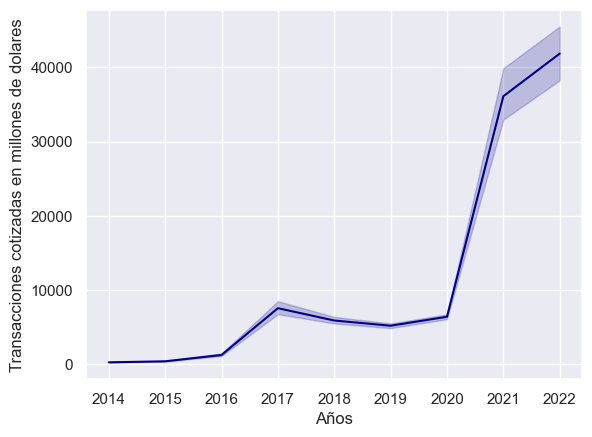

In [52]:
df['sentin_Musd'] = df['sentinusd'] / 1000000

sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="sentin_Musd", data=df, color="darkblue")
plt.xlabel("Años")
plt.ylabel("Transacciones cotizadas en millones de dolares")

En este grafico se analiza la cantidad de transacciones enviadas en BTC cotizadas en USD.

Aunque se puede apreciar en el HEATMAP previamente presentado que los precios de BTC han fluctuado y alcanzado sus máximos hace más de un año, se puede observar una tendencia creciente en el volumen de transacciones realizadas año tras año, la cual parece mantenerse.

La creciente adopción de Bitcoin es probable que haya sido un factor determinante en el aumento del volumen de transacciones. Cada vez son más las personas y empresas que están utilizando Bitcoin como medio de pago o inversión, lo que ha llevado a un aumento en la cantidad de transacciones realizadas en la red.

**HIPÓTESIS 1**

La volatibilidad en el precio de Bitcoin ha sido sumamente elevada a lo largo de los años, lo que afecta directamente a la capitalización de mercado de este activo.

En el siguiente gráfico, se contrastará la evolución del market cap de Bitcoin, para demostrar como la evolución de este sigue la misma tendencia que la evolución del precio del activo.

Text(0.5, 1.0, 'Grafico precio BTC')

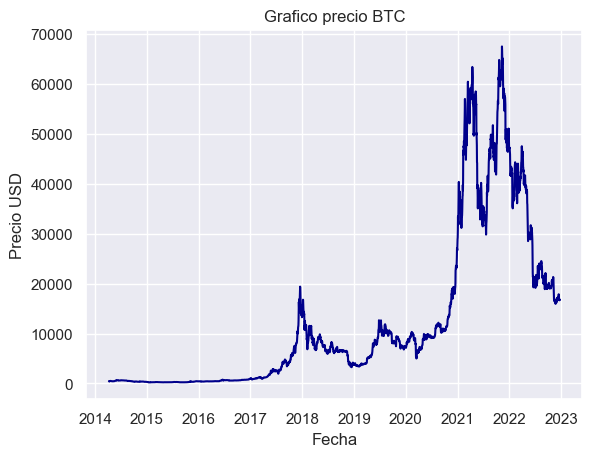

In [53]:
custom_palette = sns.color_palette(['darkblue'])
sns.set_palette(custom_palette)
fig, ax = plt.subplots()
x = df.Date
y = df.priceUSD

ax.plot(x, y, label='Precio BTC')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio USD')
ax.set_title('Grafico precio BTC')

Text(0.5, 1.0, 'Capitalización de mercado de BTC expresada en USD Miles de Millones')

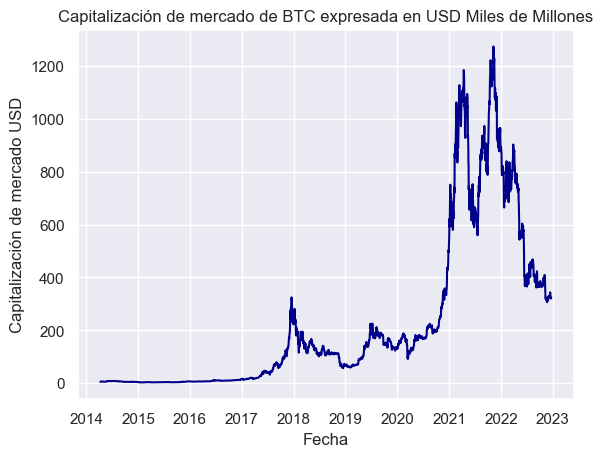

In [54]:
sns.set_palette(custom_palette)
df['marketcap_en_MM'] = df.apply(lambda row: row.marketcap / 1000000000, axis=1)
fig, ax = plt.subplots()
x = df.Date
y = df.marketcap_en_MM
ax.plot(x, y, label='Capitalización de mercado de BTC expresada en USD Miles de Millones')
ax.set_xlabel('Fecha')
ax.set_ylabel('Capitalización de mercado USD')
ax.set_title('Capitalización de mercado de BTC expresada en USD Miles de Millones')

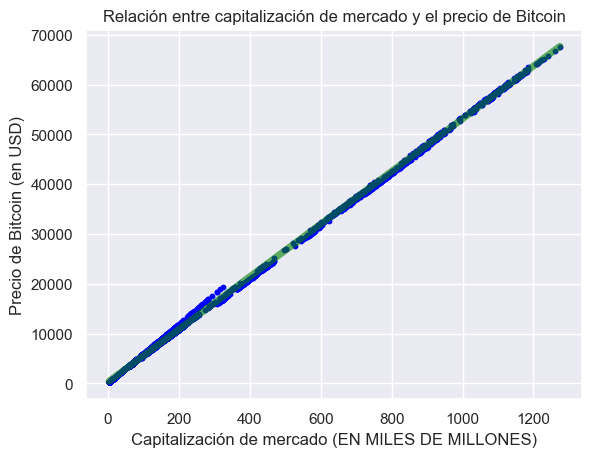

In [55]:
df['marketcap_en_MM'] = df.apply(lambda row: row.marketcap / 1000000000, axis=1)
plt.scatter(df['marketcap_en_MM'], df['priceUSD'], s=10, c='blue')

m, b = np.polyfit(df['marketcap_en_MM'], df['priceUSD'], 1)
x = np.linspace(min(df['marketcap_en_MM']), max(df['marketcap_en_MM']), 100)
y = m * x + b

plt.plot(x, y, color='green', linewidth=5, alpha=0.60)

plt.title('Relación entre capitalización de mercado y el precio de Bitcoin')
plt.xlabel('Capitalización de mercado (EN MILES DE MILLONES)')
plt.ylabel('Precio de Bitcoin (en USD)')
plt.grid(True)
plt.show()

In [56]:
correl_price_market = df['priceUSD'].corr(df['marketcap'])

print("Coeficiente de correlación:", correl_price_market)

Coeficiente de correlación: 0.9997780221209306


**CONCLUSION 1**

En los gráficos presentados podemos ver cómo la tendencia de la capitalización de mercado respeta los mismos parámetros que los del gráfico de la evolución del precio de BTC.

Como dato adicional, se calcula el coeficiente de correlación entre las variables ‘priceUSD’ y ‘marketcap’. El resultado obtenido refleja que la correlación entre ambos parámetros es prácticamente del 100%.

**HIPÓTESIS 2**

Como segunda hipótesis a plantear, surge la idea de que el precio de Bitcoin debería influir de forma directa en la cantidad de direcciones activas en determinados períodos de tiempo. Se plantea esto dado que ante precios mayores, aquellos que sean poseedores de wallets que contengan BTC tendrán mayores incentivos para realizar transacciones de compra-venta.
Para analizar este fenómeno se realizan los siguientes cálculos.

In [57]:
correlation = df['priceUSD'].corr(df['activeaddresses'])

print("La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es:", correlation)

La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es: 0.6654127601918235


Al realizar el cálculo del indice de correlación entre las "active adresseses" y el precio de BTC se nos muestra una fuerte correlación positiva entre estos factores, ya que el resultado de 0,665 se considera cercano a 1.

Para apoyar la hipotesis de que el precio de BTC influye directamente en la cantidad de direcciones activas, se procede a realizar un modelo de regresión lineal para realizar predicciones y evaluar el impacto del cambio de una variable en la otra. 

In [58]:
x = df[['priceUSD']]
y = df[['activeaddresses']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10000)

modelo = LinearRegression()
modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mediana = df['activeaddresses'].median()
print('Error Cuadrático Medio (MSE):', mse)
print('Error Cuadrático Medio Raíz (RMSE):', rmse)

Error Cuadrático Medio (MSE): 28922636911.017258
Error Cuadrático Medio Raíz (RMSE): 170066.56611755662


Los valores de MSE y RMSE que se obtienen son demasiado elevados, lo cual indica un claro problema en la normalización de los datos.

Para solucionar este problema se aplicará transformación logarítmica a las variables de interés, con el objetivo de mejorar los resultados.

Al aplicar la transformación logarítmica, es posible mejorar la linealidad de las relaciones entre variables, reducir la asimetría y estabilizar la varianza, lo que podría resultar en mejores resultados y reducción de errores de predicción en el modelo de regresión lineal. 

In [59]:
df_log = pd.DataFrame

df['PriceUSD_log'] = np.log(df['priceUSD'])
df['activeaddresses_log'] = np.log(df['activeaddresses'])
df_log = df.drop(columns=['priceUSD', 'activeaddresses'])
df_log.head(1)

c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,...,tweets,google_trends,fee_to_reward,top100cap,Year,Month,sentin_Musd,marketcap_en_MM,PriceUSD_log,activeaddresses_log
0,2014-04-09,243742.0,122401,64992,38.678,239212041.0,0.139,0.0447,8.944,5587996110,...,8193,11.193,0.502,19.211,2014,4,239.212041,5.587996,6.102805,12.096671


In [60]:
df_log['activeaddresses_log'].describe()

count    3180.000000
mean            -inf
std              NaN
min             -inf
25%        12.936532
50%        13.297468
75%        13.549254
max        13.994551
Name: activeaddresses_log, dtype: float64

Al transformar la variable 'activeaddresses' se generan valores *-inf*, los cuales pueden generar conflictos al momento de realizar el modelo de predicción

In [61]:
count_inf = np.isinf(df_log['activeaddresses_log']).sum()
print("Cantidad de valores -inf:", count_inf)

Cantidad de valores -inf: 22


Al contar la cantidad de valores *-inf* se observa que solamente son 22, dado que la cantidad no representa un peso importante sobre el total de datos, se procederá a eliminarlos del modelo.

In [62]:
df_log = df_log[~np.isinf(df_log['activeaddresses_log'])]

In [63]:
x = df_log[['PriceUSD_log', 'Year']]
y = df_log[['activeaddresses_log']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10000)

modelo_log = LinearRegression()
modelo_log.fit(x_train, y_train)

y_pred = modelo_log.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mediana = df_log['activeaddresses_log'].median()
print('Error Cuadrático Medio (MSE):', round(mse, 4))
print('Error Cuadrático Medio Raíz (RMSE):', round(rmse, 4))
print("El RMSE de este modelo representa el ", round(rmse/mediana*100, 4), "%", "de la mediana de direcciones activas.")

Error Cuadrático Medio (MSE): 0.0719
Error Cuadrático Medio Raíz (RMSE): 0.2682
El RMSE de este modelo representa el  2.0163 % de la mediana de direcciones activas.


Interpretación de resultados:

Error Cuadrático Medio (MSE): en este caso, el MSE es de 0,0719 lo cual indica que el error promedio al cuadrado de las predicciones del modelo es relativamente bajo.

Error Cuadrático Medio Raíz (RMSE): el resultado de 0,2682 indica que el error promedio entre las predicciones y los valores reales de las transacciones es relativamente bajo.

El RMSE en relación a la mediana de transacciones: En la última línea de código, se calcula el porcentaje que representa el RMSE en relación a la mediana de las transacciones. En este caso, el error promedio del modelo (RMSE) es aproximadamente el 2,0163% de la mediana de las transacciones. Esta comparación proporciona una medida relativa del rendimiento del modelo en relación a la dispersión de los valores reales de las transacciones.

En resumen, los resultados indican que el modelo de regresión lineal aplicado a las variables transformadas logarítmicamente tiene un error promedio bajo en términos absolutos (MSE y RMSE). Además, al comparar el RMSE con la mediana de las transacciones, se observa que el error del modelo representa aproximadamente el 2,0163% de la dispersión de los valores reales de las transacciones. En general, estos resultados sugieren que el modelo tiene un buen ajuste y es capaz de predecir las transacciones con un bajo nivel de error.

In [64]:
precio_prueba_max = df_log['PriceUSD_log'].max()
precio_prueba_min = df_log['PriceUSD_log'].min()
precio_prueba_median = df_log['PriceUSD_log'].median()
year_prueba = 2023

x_prueba_max = np.array([[precio_prueba_max, year_prueba]])
prediccion_prueba_1 = modelo_log.predict(x_prueba_max)
prediccion_prueba_1 = np.exp(prediccion_prueba_1)

x_prueba_min = np.array([[precio_prueba_min, year_prueba]])
prediccion_prueba_2 = modelo_log.predict(x_prueba_min)
prediccion_prueba_2 = np.exp(prediccion_prueba_2)

x_prueba_median = np.array([[precio_prueba_median, year_prueba]])
prediccion_prueba_3 = modelo_log.predict(x_prueba_median)
prediccion_prueba_3 = np.exp(prediccion_prueba_3)

print("Las direcciones activas para el precio de USD", int(np.exp(precio_prueba_max)), "son:", int(prediccion_prueba_1))
print("Las direcciones activas para el precio de USD", int(np.exp(precio_prueba_min)), "son:", int(prediccion_prueba_2))
print("Las direcciones activas para el precio de USD", int(np.exp(precio_prueba_median)), "son:", int(prediccion_prueba_3))

Las direcciones activas para el precio de USD 67547 son: 1160398
Las direcciones activas para el precio de USD 197 son: 635798
Las direcciones activas para el precio de USD 6581 son: 912702


c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


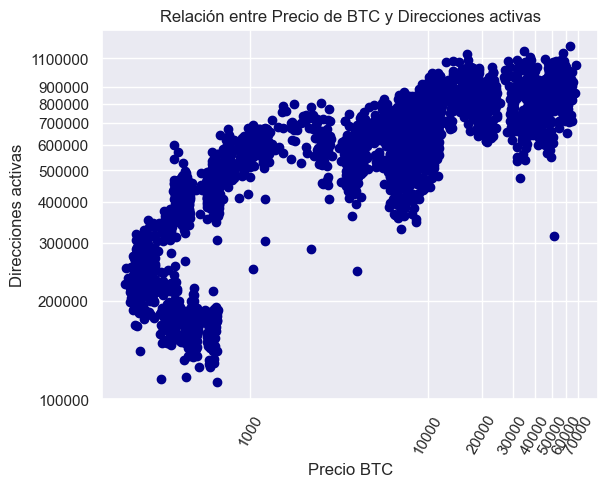

In [65]:
plt.scatter(df_log['PriceUSD_log'], df_log['activeaddresses_log'])
plt.xlabel('Precio BTC')
plt.ylabel('Direcciones activas')
plt.title('Relación entre Precio de BTC y Direcciones activas')

x_ticks = np.array([1000, 10000, 20000, 30000, 40000, 50000, 60000, 70000])
plt.xticks(np.log(x_ticks), x_ticks)
plt.xticks(np.log(x_ticks), x_ticks.astype(int), rotation=60)

y_ticks = np.array([100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1100000])
plt.yticks(np.log(y_ticks), y_ticks.astype(int))

plt.show()

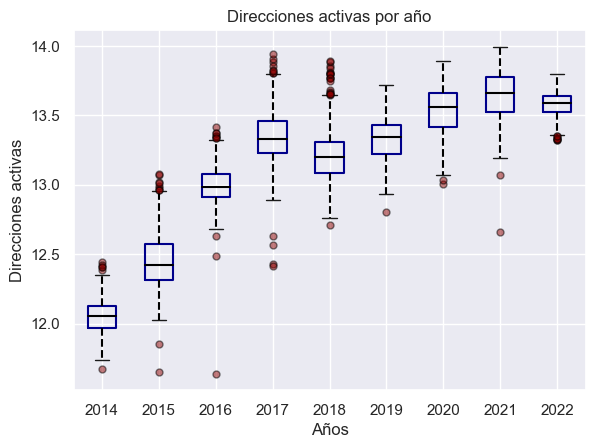

In [66]:
boxprops = dict(linestyle='-', linewidth=1.5, color='darkblue')
whiskerprops = dict(linestyle='--', linewidth=1.5, color='black')
flierprops = dict(marker='o', markerfacecolor='darkred', markersize=5, alpha=0.5)
medianprops = dict(linestyle='-', linewidth=1.5, color='black')

df.boxplot(column='activeaddresses_log', by='Year', boxprops=boxprops, whiskerprops=whiskerprops, flierprops=flierprops, medianprops=medianprops)
plt.xlabel('Años')
plt.ylabel('Direcciones activas')
plt.title('Direcciones activas por año')
plt.suptitle('')

plt.show()

**CONCLUSIÓN 2**

Se puede concluir que el precio de Bitcoin es un factor importante para determinar la cantidad de direcciones activas. En los cálculos de predicción realizados, se observa que para el año 2023, si el precio de Bitcoin alcanza su valor máximo histórico de USD 67.547, se espera que haya alrededor de 1.160.398 direcciones activas. Por otro lado, si el precio de Bitcoin alcanza su valor mínimo histórico de USD 197, se espera que haya alrededor de 635.798 direcciones activas. Finalmente, si el precio de Bitcoin alcanza su valor mediano histórico de USD 6.581, se espera que haya alrededor de 912.702 direcciones activas.

Esto sugiere que a medida que el precio de Bitcoin aumenta, también lo hace la cantidad de direcciones activas (tal cual se planteaba en la hipótesis 2). En el futuro, si el precio de Bitcoin continúa aumentando, se podría esperar un aumento en la cantidad de direcciones activas.

**DATOS ADICIONALES**

Dado que el dataset utilizado presenta información hasta finales del año 2022, se plantea un metodo para obtener información actualizada sobre el precio de BTC utilizando la importación de datos por medio de APIs.

La API seleccionada es la de *BitcoinCharts*, la información que se considera relevante en esta API es la de precios ponderados de BTC actualizados diariamente. La API retorna el precio promedio ponderado(PPP) de BTC de las últimas 24 horas, ofreciendo también el calculo de PPP semanal y PPP mensual.


En esta API también se puede encontrar información actualizada diariamente sobre operaciones de trading realizadas en diferentes exchanges. Respecto a esta información, por el momento no se considera relevante para el análisis.

In [67]:
url_ponderados = 'http://api.bitcoincharts.com/v1/weighted_prices.json'
df_ponderados = requests.get(url_ponderados)

In [68]:
def imprime_df(i):
    print(i)

imprime_df(df_ponderados)

<Response [200]>


In [69]:
print(len(df_ponderados.text))
df_ponderados.text

497


'{"USD": {"7d": "26496.03", "30d": "26898.90", "24h": "26516.04"}, "AUD": {"7d": "39890.88", "30d": "40575.77", "24h": "39553.04"}, "timestamp": 1686269707, "KRW": {"7d": "35217985.97", "30d": "35942301.34", "24h": "35007389.21"}, "JPY": {"7d": "3743608.00", "30d": "3737814.50", "24h": "3695513.73"}, "ILS": {"7d": "100292.57", "30d": "100608.38", "24h": "99223.83"}, "EUR": {"7d": "24697.15", "30d": "24929.44", "24h": "24631.98"}, "CAD": {"7d": "35621.20", "30d": "36303.78", "24h": "35266.58"}}'

In [70]:
texto_ponderados = df_ponderados.text
json.loads(texto_ponderados)

{'USD': {'7d': '26496.03', '30d': '26898.90', '24h': '26516.04'},
 'AUD': {'7d': '39890.88', '30d': '40575.77', '24h': '39553.04'},
 'timestamp': 1686269707,
 'KRW': {'7d': '35217985.97', '30d': '35942301.34', '24h': '35007389.21'},
 'JPY': {'7d': '3743608.00', '30d': '3737814.50', '24h': '3695513.73'},
 'ILS': {'7d': '100292.57', '30d': '100608.38', '24h': '99223.83'},
 'EUR': {'7d': '24697.15', '30d': '24929.44', '24h': '24631.98'},
 'CAD': {'7d': '35621.20', '30d': '36303.78', '24h': '35266.58'}}

In [71]:
jsondata_p = json.loads(texto_ponderados)
df_ponderados1 = pd.DataFrame.from_dict(jsondata_p)
df_ponderados1.head()

,USD,AUD,timestamp,KRW,JPY,ILS,EUR,CAD
7d,26496.03,39890.88,1686269707,35217985.97,3743608.00,100292.57,24697.15,35621.20
30d,26898.90,40575.77,1686269707,35942301.34,3737814.50,100608.38,24929.44,36303.78
24h,26516.04,39553.04,1686269707,35007389.21,3695513.73,99223.83,24631.98,35266.58


In [72]:
data_markets = pd.read_json(df_ponderados.text)
precios_ponderados120523 = '..\data\PPP_bitcoincharts\ponderados120523.csv'
data_markets.to_csv(precios_ponderados120523, index=False)

#Se exporta el archivo a la carpeta data, en formato .csv para guardar un historial de esta información.

## DESAFIO INGENIERIA DE ATRIBUTOS Y SELECCION DE VARIABLES 08/06/2023

✓	Crear variables sintéticas adicionales que permitan mejorar el desempeño del modelo de ML en la entrega anterior.

A continuación se crean las siguientes variables: 
- marketcapM : expresa la capitalización de mercado en millones de dolares
- activeaddresses : toma solamente las direcciones activas mayores que cero
- prom_trans_actadresses : realiza el promedio de transacciones por direcciones activas de cada dia

In [152]:
df_newvars = pd.DataFrame()

df_newvars['date'] = df['Date']
df_newvars['price_usd'] = df['priceUSD']
df_newvars['marketcapM'] = df['marketcap'] /1000000
df_newvars['transactions'] = df['transactions']
df_newvars['activeaddresses'] = df['activeaddresses'][df['activeaddresses'] > 0]
df_newvars['prom_trans_actadresses'] = df_newvars['transactions'] / df_newvars['activeaddresses']

df_newvars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    3180 non-null   datetime64[ns]
 1   price_usd               3180 non-null   float64       
 2   marketcapM              3180 non-null   float64       
 3   transactions            3180 non-null   int64         
 4   activeaddresses         3158 non-null   float64       
 5   prom_trans_actadresses  3158 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 149.2 KB


In [153]:
print(df_newvars.isnull().sum())

date                       0
price_usd                  0
marketcapM                 0
transactions               0
activeaddresses           22
prom_trans_actadresses    22
dtype: int64


In [154]:
df_newvars.dropna(subset=['activeaddresses', 'prom_trans_actadresses'], inplace=True)
df_newvars.reset_index(drop=True, inplace=True)
print(df_newvars.isnull().sum())

date                      0
price_usd                 0
marketcapM                0
transactions              0
activeaddresses           0
prom_trans_actadresses    0
dtype: int64


Se eliminan 22 valores nulos del nuevo dataset generado.

In [155]:
df_newvars.set_index('date', inplace=True)

Se establece como indice la columna de fecha.

In [156]:
df_newvars.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3158 entries, 2014-04-09 to 2022-12-22
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price_usd               3158 non-null   float64
 1   marketcapM              3158 non-null   float64
 2   transactions            3158 non-null   int64  
 3   activeaddresses         3158 non-null   float64
 4   prom_trans_actadresses  3158 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 148.0 KB


In [157]:
from sklearn.preprocessing import StandardScaler

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Seleccionar las características a estandarizar (todas las columnas en este caso)
features_to_scale = ['price_usd', 'marketcapM', 'transactions', 'activeaddresses', 'prom_trans_actadresses']

# Aplicar la estandarización a las características seleccionadas
df_newvars_std = pd.DataFrame()
df_newvars_std[features_to_scale] = scaler.fit_transform(df_newvars[features_to_scale])

In [159]:
df_newvars_std.describe()

,price_usd,marketcapM,transactions,activeaddresses,prom_trans_actadresses
count,3158.00000,3158.00000,3158.00000,3158.00000,3158.00000
mean,-0.00000,0.00000,0.00000,0.00000,-0.00000
std,1.00016,1.00016,1.00016,1.00016,1.00016
min,-0.75213,-0.73884,-2.24789,-1.97779,-2.31548
25%,-0.72674,-0.71776,-0.52627,-0.68432,-0.85263
50%,-0.35390,-0.37188,0.17897,0.07366,-0.00773
75%,0.19457,0.15229,0.70688,0.78912,0.67778
max,3.44883,3.45679,3.01186,2.60144,16.64708


✓	Probar distintos modelos y elegir el mejor teniendo en cuenta el Bias-Variance tradeoff 

In [160]:
x = df_newvars_std[['transactions', 'activeaddresses']]
y = df_newvars_std['price_usd']

### LINEAR REGRESSION

In [161]:
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x, y, test_size=0.25, random_state=10000)

# Paso1: entrenar el modelo.
model_lr = LinearRegression()
model_lr.fit(x_train_lr, y_train_lr)

# Paso2: Calcular el MSE y RMSE en el conjunto de entrenamiento.
y_train_pred_lr = model_lr.predict(x_train_lr)
mse_train_lr = mean_squared_error(y_train_lr, y_train_pred_lr)
print(f'MSE en el conjunto de entrenamiento:, {mse_train_lr:.4f}')
print(f'RMSE en el conjunto de entrenamiento:, {math.sqrt(mse_train_lr):.4f}')

# Paso3: Calcular el MSE y RMSE en el conjunto de prueba.
y_test_pred_lr = model_lr.predict(x_test_lr)
mse_test_lr = mean_squared_error(y_test_lr, y_test_pred_lr)
print(f'MSE en el conjunto de prueba:, {mse_test_lr:.4f}')
print(f'RMSE en el conjunto de prueba: {math.sqrt(mse_test_lr):.4f}')

MSE en el conjunto de entrenamiento:, 0.3784
RMSE en el conjunto de entrenamiento:, 0.6151
MSE en el conjunto de prueba:, 0.3640
RMSE en el conjunto de prueba: 0.6033


### POLYNOMIAL FEATURES

In [162]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

# Paso1: entrenar el modelo.
x_train_pf, x_test_pf, y_train_pf, y_test_pf = train_test_split(x_poly, y, test_size=0.2, random_state=42)

# Paso2: Calcular el MSE y RMSE en el conjunto de entrenamiento.
model_pf = LinearRegression()
model_pf.fit(x_train, y_train)

# Paso3: Calcular el MSE y RMSE en el conjunto de entrenamiento.
y_train_pred_pf = model_pf.predict(x_train_pf)
mse_train_pf = mean_squared_error(y_train_pf, y_train_pred_pf)
print(f'MSE en el conjunto de entrenamiento: {mse_train_pf:.4f}')
print(f'RMSE en el conjunto de entrenamiento: {math.sqrt(mse_train_pf):.4f}')

# Paso3: Calcular el MSE y RMSE en el conjunto de prueba.
y_test_pred_pf = model_pf.predict(x_test_pf)
mse_test_pf = mean_squared_error(y_test_pf, y_test_pred_pf)
print(f'MSE en el conjunto de prueba: {mse_test_pf:.4f}')
print(f'RMSE en el conjunto de prueba: {math.sqrt(mse_test_pf):.4f}')

MSE en el conjunto de entrenamiento: 0.3355
RMSE en el conjunto de entrenamiento: 0.5792
MSE en el conjunto de prueba: 0.2999
RMSE en el conjunto de prueba: 0.5476


In [163]:
from sklearn.model_selection import cross_val_score

# Modelo Linear Regression
scores_lr = cross_val_score(model_lr, x_train_lr, y_train_lr, cv=5)  # Validación cruzada con 5 folds
mean_score_lr = scores_lr.mean()  # Puntuación media

# Modelo Polynomial Features
model_pf = LinearRegression()
scores_pf = cross_val_score(model_pf, x_train_pf, y_train_pf, cv=5)  # Validación cruzada con 5 folds
mean_score_pf = scores_pf.mean()  # Puntuación media

print(f'Puntuación media del modelo Linear Regression: {mean_score_lr:.4f}')
print(f'Puntuación media del modelo Polynomial Features: {mean_score_pf:.4f}')

Puntuación media del modelo Linear Regression: 0.6310
Puntuación media del modelo Polynomial Features: 0.6617


El modelo que mejor performa es el Polynomial Features, ya que presenta mejores valores de MSE y RMSE tanto en train como en test.

Además al comparar ambos modelos aplicando cross validation, también se encuentra que este modelo posee mejores resultados.

✓	Realizar PCA sobre las variables usadas y explorar las cargas de los 2 primeros componentes, identificar las variables más relevantes

### PCA

In [175]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

df_newvars_PCA = df_newvars
df_newvars_PCA = df_newvars_PCA.drop('prom_trans_actadresses', axis=1)


# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_newvars_PCA)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [176]:
pca_pipe

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [177]:
pca_pipe.fit(df_newvars_PCA)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [178]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_newvars_PCA.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,price_usd,marketcapM,transactions,activeaddresses
PC1,0.52661,0.52493,0.39816,0.53722
PC2,0.43433,0.44006,-0.71535,-0.32556
PC3,0.17744,0.18272,0.57424,-0.77806
PC4,0.70892,-0.70527,-0.00123,-0.00486


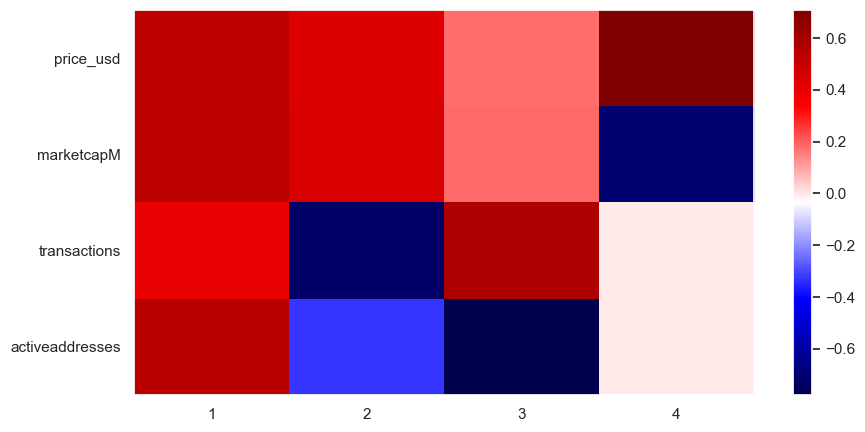

In [179]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='seismic', aspect='auto')
plt.yticks(range(len(df_newvars_PCA.columns)), df_newvars_PCA.columns)
plt.xticks(range(len(df_newvars_PCA.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();